In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
jar = pd.read_csv('fuel_swelling_5-grains_no-fitting.csv')

fd = 'Fission Density (10^21 f/cm3)'
gs = 'Grain Size (um)'
fr = 'Fission Rate (10^14 f/cm3/s)'
fgs = 'Fuel Gas Swelling (%)'
ct = 'Coolant init Temp (C)'

In [3]:
def pared(X, a, b, c, d):
    fd, D, r, T = X

    a1 = 2.53
    b1 = 0.606
    c1 = 4.27
    d1 = 0.45
    def A(D):
        return (a1 * np.exp(-b1*(D-c1)) + d1) \
            * (a*(r-6) + b*(T-88) + 1)

    def B(D):
        return 3.08

    def C(D):
        return 0.932

    a4 = 38.431
    b4 = 0.09157
    c4 = 0.75734
    h4 = 17.9118
    def L(D):
        return a4 * np.exp(-b4*D) * np.log(c4*D) + h4 \
            * (c*(r-6) + d*(T-88) + 1)

    a5 = 1.78
    b5 = 0.59
    c5 = 2.14
    d5 = 1.15
    def M(D):
        return a5 * np.exp(-b5*(D-c5)) + d5

    b6 = 2.04
    c6 = 2.95
    k6 = 0.24
    def N(D):
        return c6 * (b6 - np.exp(-k6*D))

    return A(D) / (1 + np.exp(-B(D) * (fd - C(D)))) \
        + L(D) / (1 + np.exp(-M(D) * (fd - N(D))))

In [4]:
jerk = jar[fd].copy()

In [5]:
jerk

0        0.05184
1        0.06912
2        0.08640
3        0.10368
4        0.12096
          ...   
22741    6.65280
22742    6.73920
22743    6.82560
22744    6.91200
22745    6.99840
Name: Fission Density (10^21 f/cm3), Length: 22746, dtype: float64

In [6]:
jerky = [1 if x < 3 else 0.2 for x in jerk]

In [7]:
popt, pcov = curve_fit(pared, (jar[fd], jar[gs], jar[fr], jar[ct]), jar[fgs], sigma=jerky)
popt

array([0.01590164, 0.00169045, 0.22635333, 0.02035649])

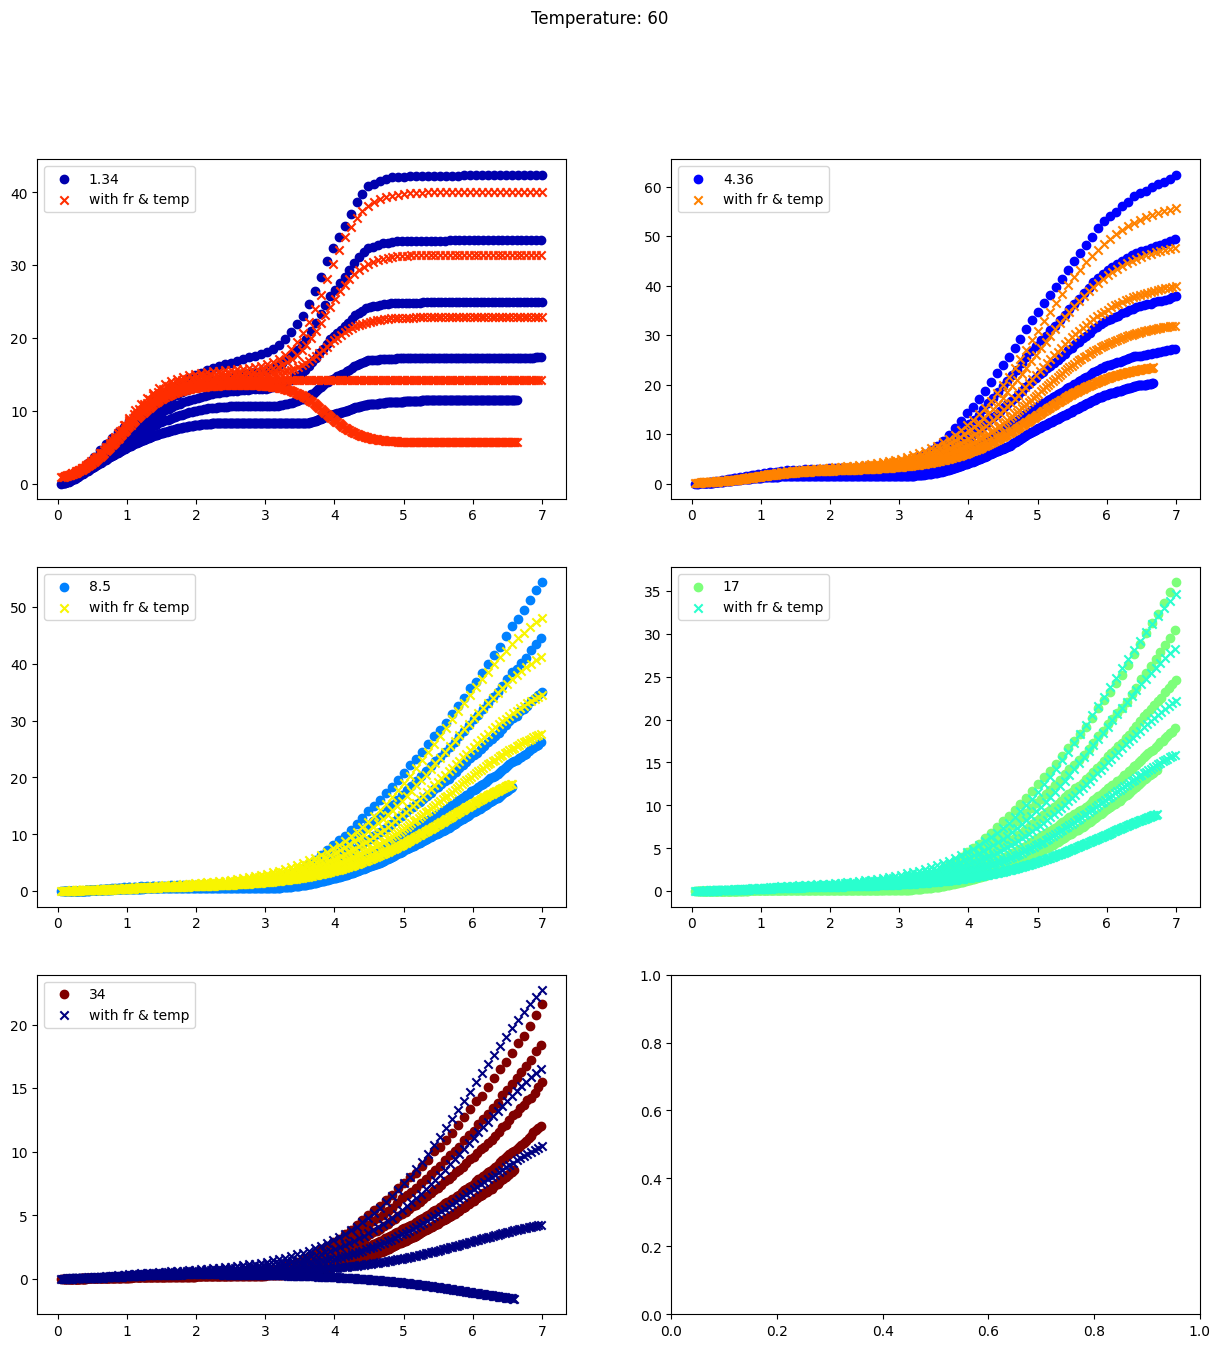

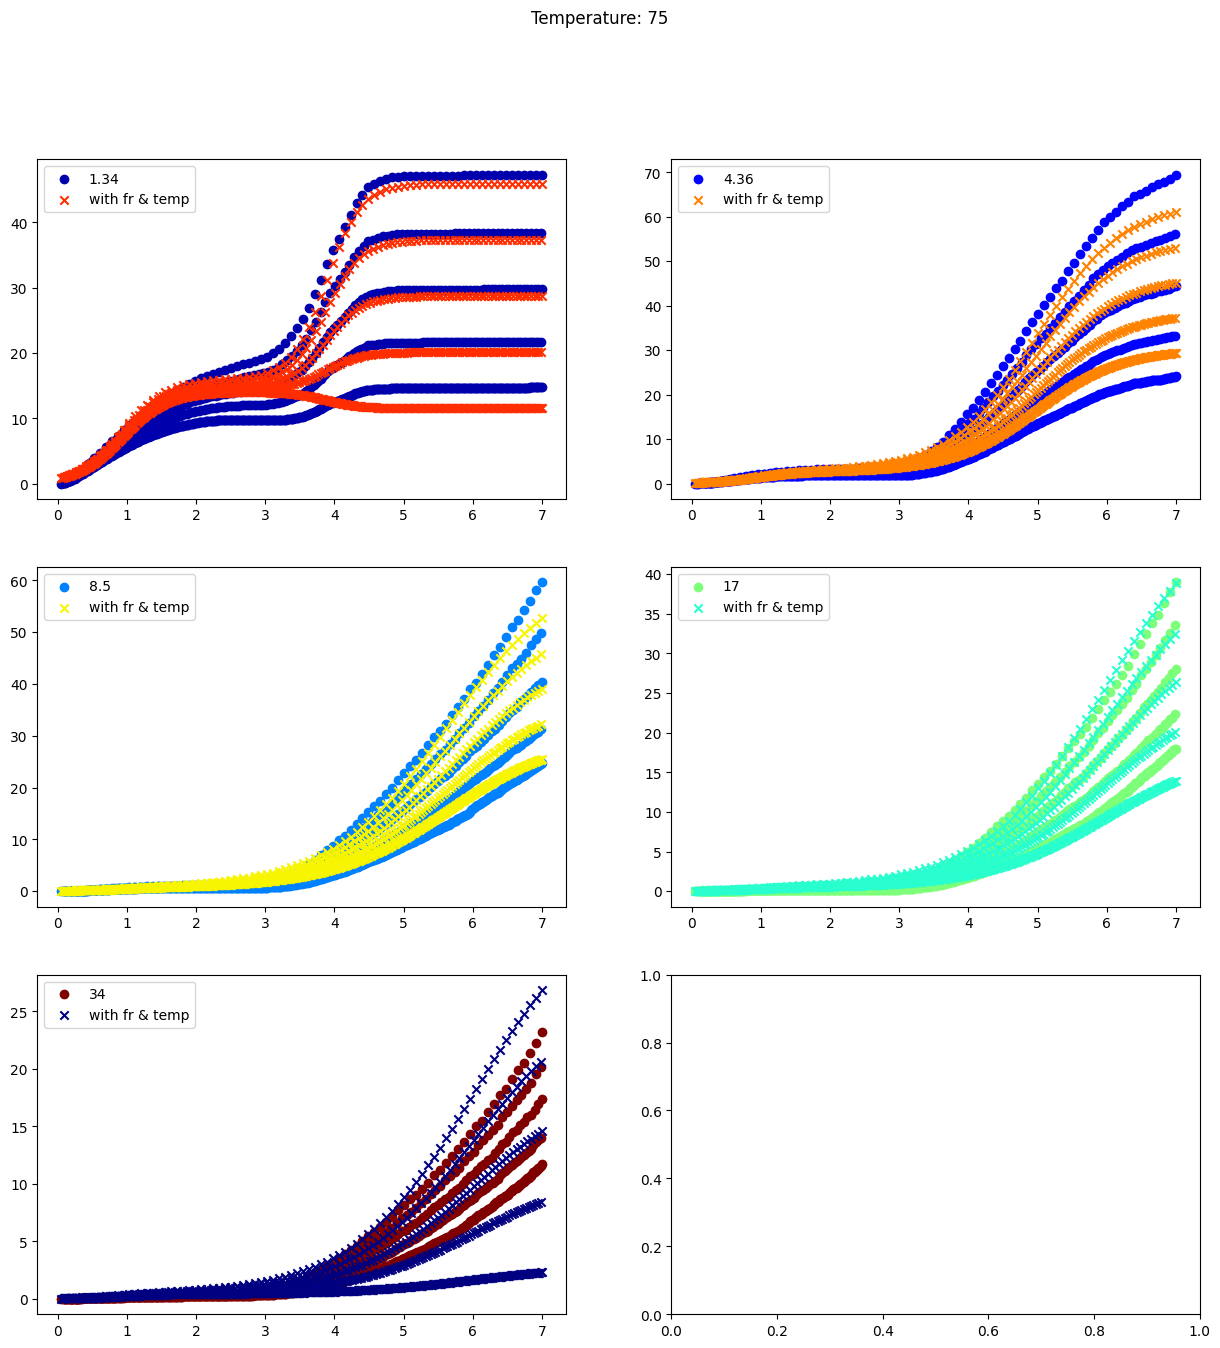

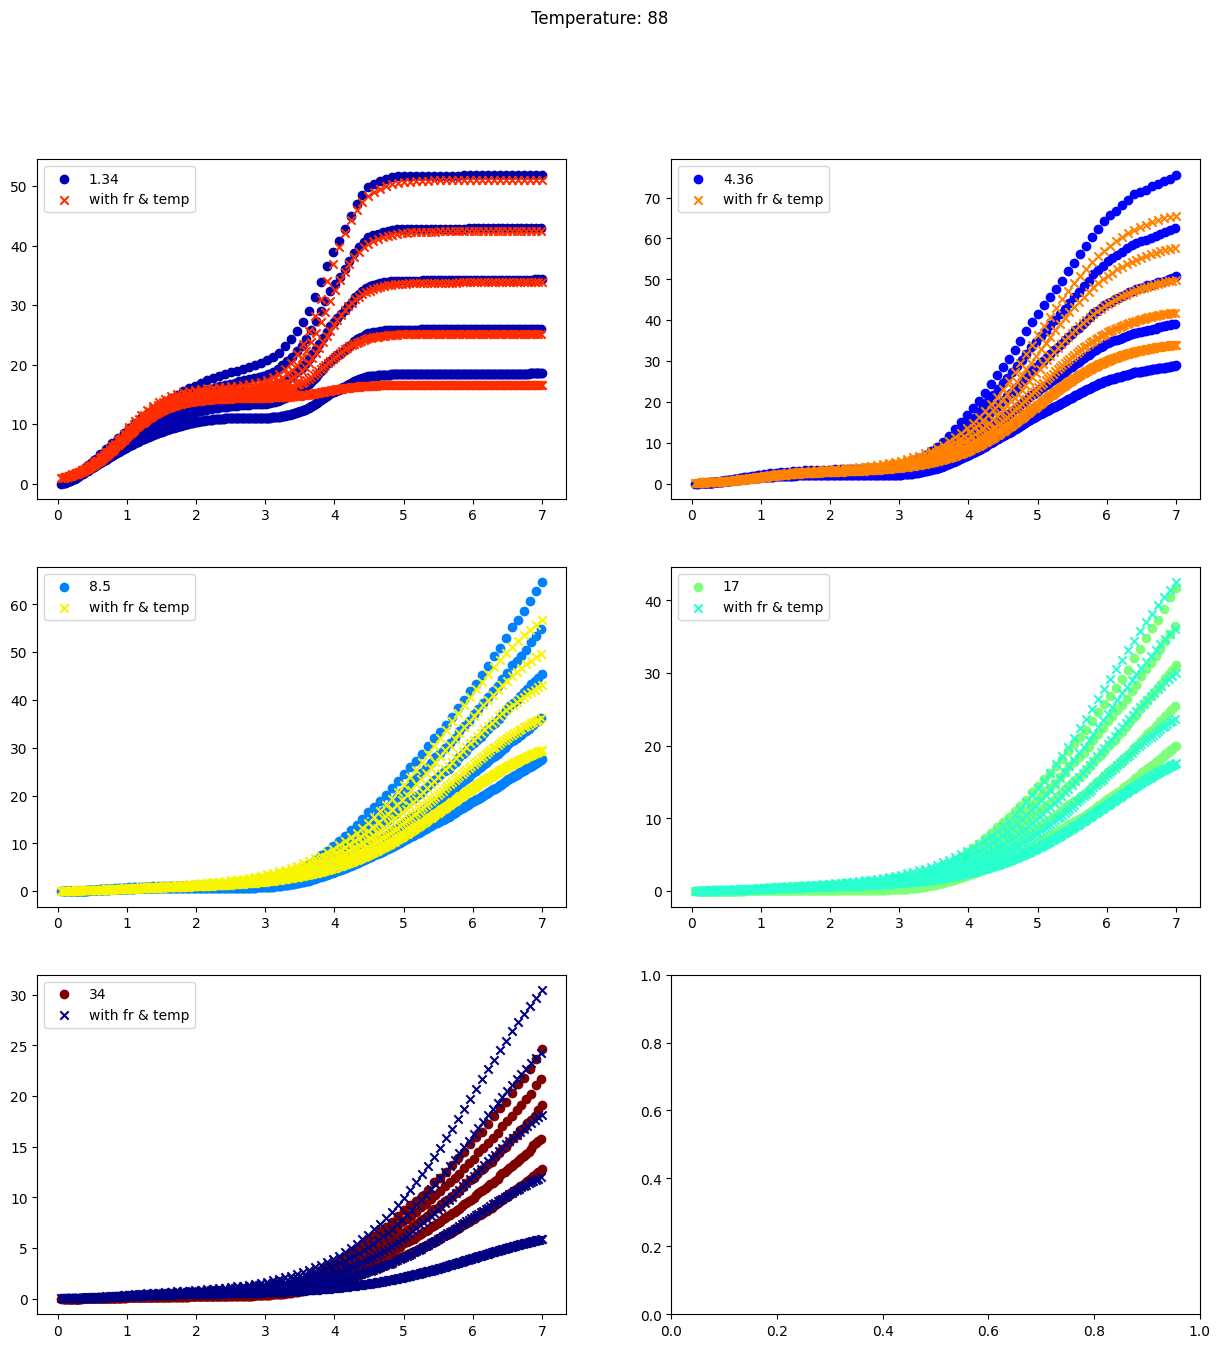

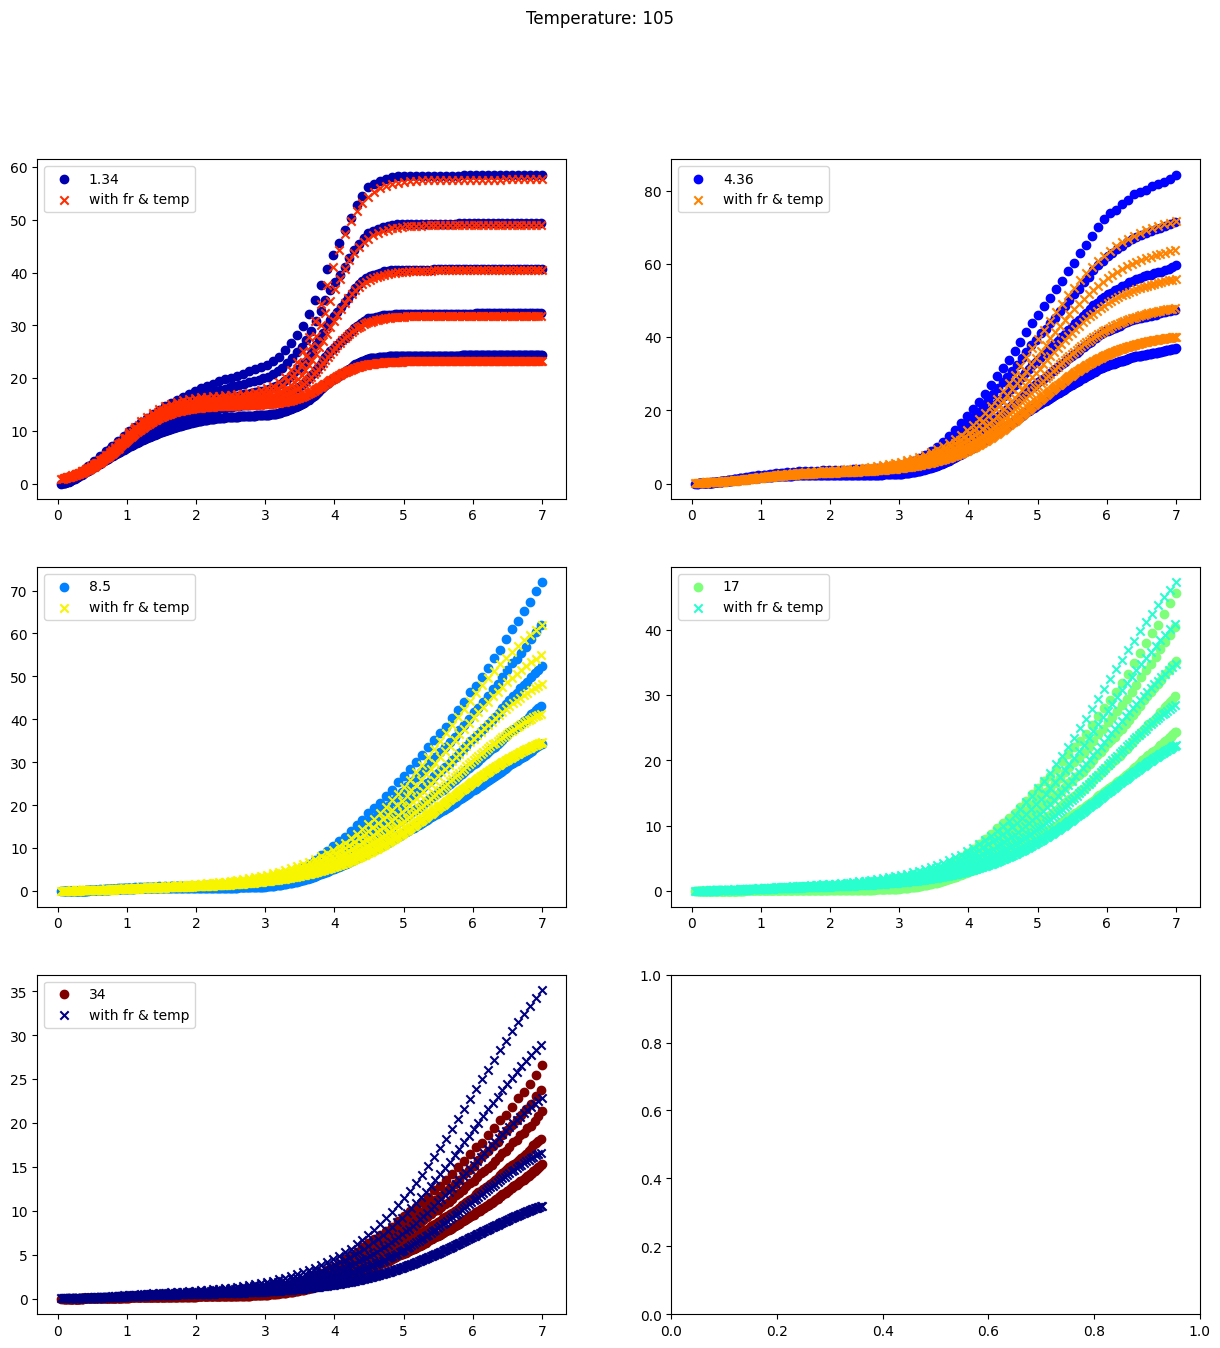

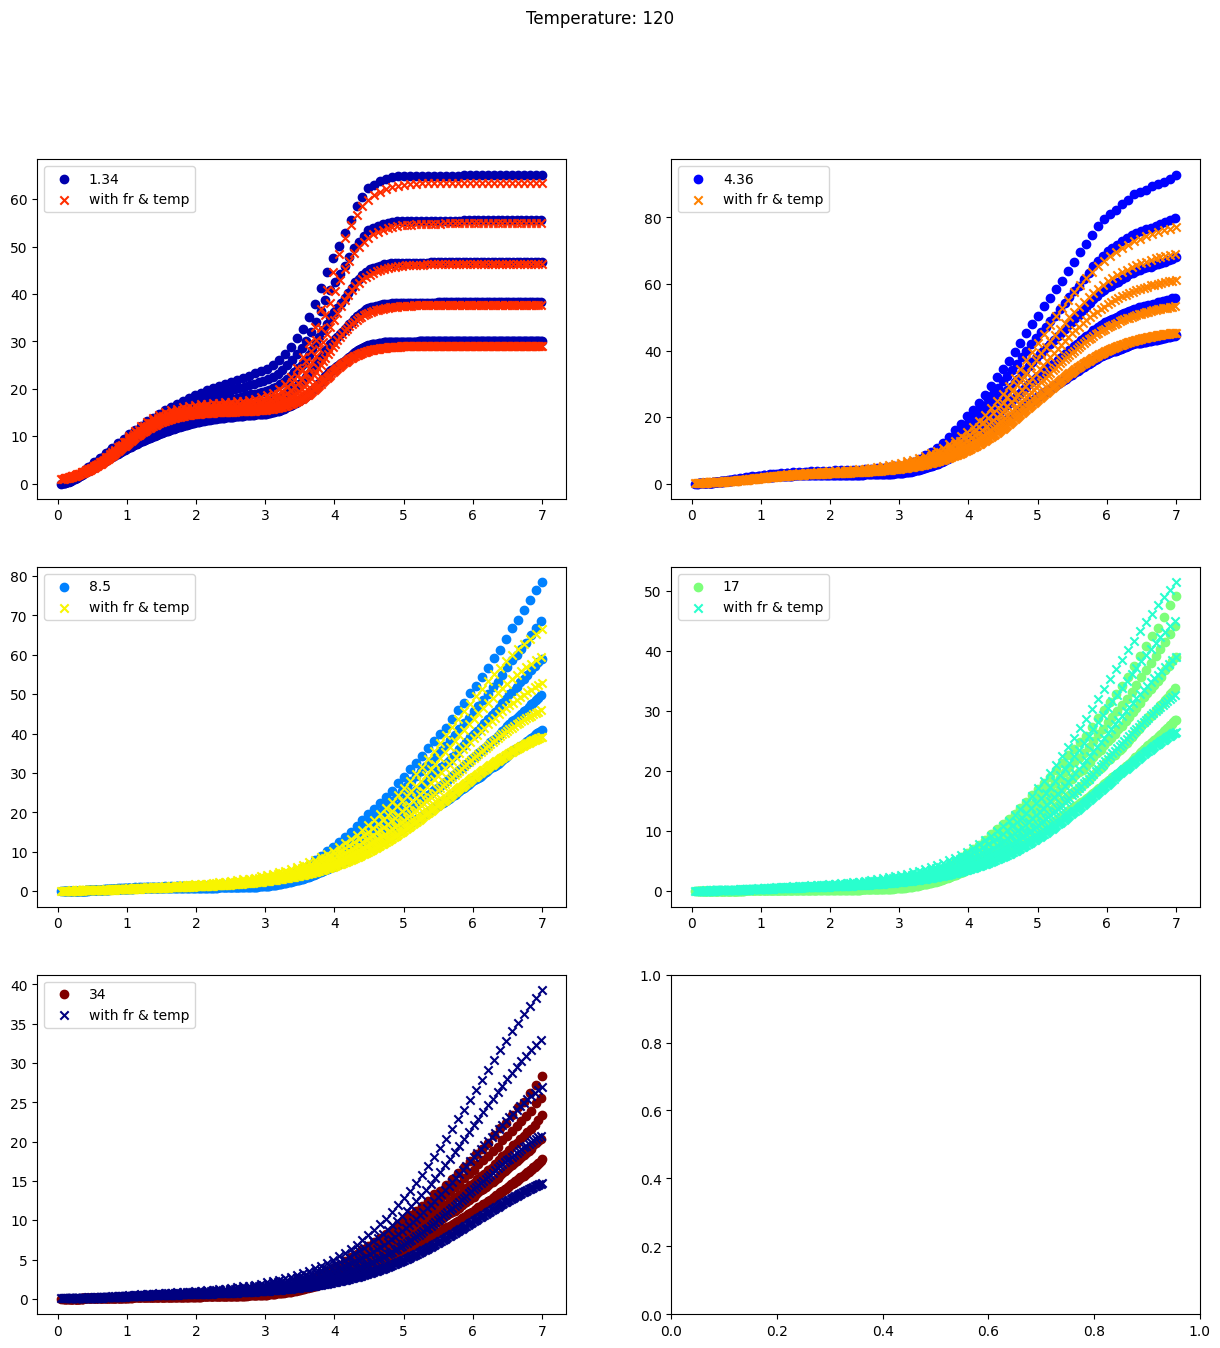

In [8]:
for cool in [60, 75, 88, 105, 120]:
#for cool in [60, 120]:
    fig, axs = plt.subplots(3, 2, figsize=(15,15))
    fig.suptitle(f'Temperature: {cool}')
    
    for i, G in zip(range(5), [1.34, 4.36, 8.5, 17, 34]):
        foo = jar.loc[(jar['Coolant init Temp (C)'] == cool) & (jar[gs] == G)]
        axs[i//2, i%2].scatter(foo[fd], foo[fgs], color=plt.cm.jet(G/34), label=f'{G}')
        pred = pared((foo[fd], foo[gs], foo[fr], foo[ct]), *popt)
        axs[i//2, i%2].scatter(foo[fd], pred, marker='x', color=plt.cm.jet(0.9-G/34), label='with fr & temp')
        axs[i//2, i%2].legend()
        
    plt.show()